# BAYESIAN OPTIMISATION IN A BIG DATA SCENARIO

In [1]:
# importing modules
import numpy as np
import pandas as pd
import random
import math
from datetime import datetime
from scipy.optimize import minimize
from scipy.stats import norm
from sklearn.gaussian_process.kernels import RBF, Matern,ConstantKernel as C
from skopt import gp_minimize
from skopt.plots import plot_convergence
from bayes_opt import BayesianOptimization
from matplotlib import pyplot as plt

## Minimising the function in 3D
\
We implemented a 3D gaussian problem which has the following variables: x,y and z;\
\
The equation which defined our objective function was;\
\
$f(x,y,z)=2x^{3}-7xy^{2}+4xz+z^{2} $


In [2]:
#The objective function is being defined
def f(x, y, z):
    return 2*x**3-7*x*y**2+4*y*x*z+z**2
# Setting the bounds for the parameters
bounds = {'x': (-3,3), 'y': (-3,3), 'z': (-3,3)}

# We now perfom BayesianOptimisation 
optimizer = BayesianOptimization(f=f, pbounds=bounds)

# We aim to optimise the function for 10 iteration
optimizer.maximize(init_points=5, n_iter=5)

# Finding the minimum of the function
minimum = -optimizer.max['target']

# Displaying  the results
print("Minimum value found ", optimizer.max['params'])
print("Minimum value =", minimum)

|   iter    |  target   |     x     |     y     |     z     |
-------------------------------------------------------------
| 1         | 27.38     | 2.542     | -0.5735   | -0.06406  |
| 2         | -13.15    | -2.255    | 0.6165    | -0.6125   |
| 3         | 5.09      | -0.3593   | 1.456     | 2.019     |
| 4         | 2.177     | 0.1785    | 0.193     | 1.42      |
| 5         | 27.01     | 2.399     | 0.7033    | 0.9938    |
| 6         | -106.7    | 3.0       | 2.347     | -1.701    |
| 7         | -0.9997   | 3.0       | -1.187    | 2.093     |
| 8         | -57.14    | 1.519     | -2.641    | -0.6008   |
| 9         | 28.66     | 1.926     | 1.102     | 2.738     |
| 10        | -32.88    | 2.705     | 2.898     | 2.553     |
Minimum value found  {'x': 1.9262658277986402, 'y': 1.1020882131148724, 'z': 2.737653510306705}
Minimum value = -28.659310777249775


WE NOW PLOT OPTIMISATION HISTORY AS FOLLOWS


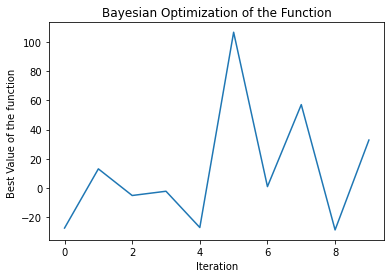

In [3]:
print('=================================================================================')
print('WE NOW PLOT OPTIMISATION HISTORY AS FOLLOWS')
print('=================================================================================')
# Plot the optimization history
history = optimizer.res
x = [i for i in range(len(history))]
y = [-i['target'] for i in history]
plt.plot(x, y)
plt.xlabel('Iteration')
plt.ylabel('Best Value of the function ')
plt.title('Bayesian Optimization of the Function')
plt.show()

# Implementing Bayesian Optimisation using the NYSE Data


### LOADING THE DATA INTO PYTHON

In [4]:
#importing data into python using panda
df = pd.read_csv('Downloads/prices.csv')
df1 = pd.read_csv('Downloads/securities.csv')

### CHECKING FOR THE LOADED DATA

In [5]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
df1.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


### DATA SIZE

In [7]:
#Number of Sample for the data
Sample=len(df) 
Sample1=len(df1) 
print('The length of price data is\t',Sample)
print('The length of securites data is\t',Sample1)

The length of price data is	 851264
The length of securites data is	 505


## Data Infomation

In [8]:
# checking the information regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


## Data Description

In [10]:
# describing the data
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Data Processing

### Selecting 3 Stocks Randomly

In [11]:
# Randomly select three stocks
selected_stock = df['symbol'].sample(n=3, random_state=13)

df = df.loc[df['symbol'].isin(selected_stock), :]
df

,date,symbol,open,close,low,high,volume
531,2010-01-04,MET,35.880001,36.299999,35.459999,36.340000,4767000.0
673,2010-01-04,UNM,19.730000,19.940001,19.549999,20.049999,3110300.0
702,2010-01-04,WU,19.100000,19.090000,19.049999,19.240000,4277900.0
999,2010-01-05,MET,36.080002,37.139999,36.009998,37.230000,5604300.0
1141,2010-01-05,UNM,19.850000,20.230000,19.799999,20.290001,1989000.0
...,...,...,...,...,...,...,...
850715,2016-12-29,UNM,43.970001,43.810001,43.700001,44.330002,802100.0
850745,2016-12-29,WU,21.799999,21.830000,21.719999,21.950001,2001800.0
851061,2016-12-30,MET,53.919998,53.889999,53.740002,54.119999,4188500.0
851215,2016-12-30,UNM,44.060001,43.930000,43.730000,44.110001,1054000.0


## Calculating the mean return and saving them into the matrix

In [12]:
#calculate mean return of each stock
mean_stock = df.groupby('symbol')['close',].mean().reset_index().rename(columns={'close': 'mean'})
#a=mean_stock.to_numpy()
mean_array =mean_stock['mean'].to_numpy()
mean_array

array([43.85099885, 28.51871737, 17.89182746])

## Deaming the prices (How far are the prices from the mean)
 ### we are only considering the closing stock prices

In [13]:
df_MET = df[df['symbol'] == 'MET']
demean_met = [x-mean_array[0] for x in (df_MET["close"].to_numpy())]

df_UNM = df[df['symbol'] == 'UNM']
demean_unm =[x-mean_array[1] for x in (df_UNM["close"].to_numpy())]

df_WU = df[df['symbol'] == 'WU']
demean_wu =[x-mean_array[2] for x in (df_WU["close"].to_numpy())]

matrix_demean = np.transpose([demean_met,demean_unm, demean_wu])
matrix_demean

array([[-7.55099985, -8.57871637,  1.19817254],
       [-6.71099985, -8.28871737,  1.11817254],
       [-6.33099885, -8.10871737,  1.10817254],
       ...,
       [10.11900215, 15.44128163,  3.83817254],
       [ 9.94900015, 15.29128363,  3.93817254],
       [10.03900015, 15.41128263,  3.82817154]])

## Covariance Matrix Calculation

In [14]:
covariance_matrix = (np.transpose(matrix_demean)@matrix_demean)/len(demean_wu)
covariance_matrix

array([[57.31782905, 39.96860826,  5.71553873],
       [39.96860826, 36.55947315,  5.00233586],
       [ 5.71553873,  5.00233586,  3.95435453]])

### Variances of Each stock
By cheking the diagonal elements of covariance matrix

In [15]:
variance_stock = np.diag(covariance_matrix)
variance_stock

array([57.31782905, 36.55947315,  3.95435453])

## Randomly Selects the weights

In [16]:
weights  = np.random.rand(3)
weights =weights/sum(weights)
weights

array([0.1095909 , 0.41069881, 0.47971029])

## Calculating the expected return

In [17]:
expected_portfolio_returns = mean_array@(np.transpose(weights))
expected_portfolio_returns

25.10116740709457

# Implementation of Bayesian Optimisation

## Defining Objective Function

In [18]:
def fittness_function(weights):
    if sum(weights) >1:
        return 0
    else:
        objective_function= (np.transpose(weights))@covariance_matrix@weights
        return (-1)*objective_function

## Running Bayesian optimisation
- we make use of the following:
    1. Gaussian process
    2. Expected Improvement Acquisition Function

In [19]:
bounds=[(0,1) ,(0,1),(0,1)]
res = gp_minimize(fittness_function, # this is the function we want to minimize
bounds, # the bounds 
acq_func="EI", # The Expected improvement acquisition function was used. 
n_calls=10, # This stands for number of evaluations of the function
n_random_starts=5, # the number of random initialization points
noise=0.1**2, # the noise level 
random_state=1234) # the random seed

/home/moses/.local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/moses/.local/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [20]:
res

          fun: -57.3178290481522
    func_vals: array([  0.        ,   0.        , -36.55947315,  -0.        ,
       -36.55947315, -57.31782905, -57.31782905,   0.        ,
        -3.95435453, -57.31782905])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1], nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1], nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1], nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), Gaussi

## Convergence Plot

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

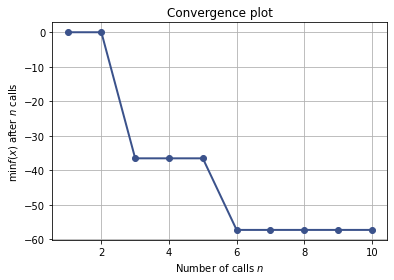

In [21]:
plot_convergence(res)

## We Merge the weights and three selected stocks to the securities data as follows

In [22]:
weights = res.x
pd.DataFrame({'stock': selected_stock.values, 'weight': weights}).merge(df1, left_on='stock', right_on='Ticker symbol')    .drop('Ticker symbol', axis=1).sort_values('weight', ascending=False)    .reset_index(drop=True).style.format({'weight': '{:.2%}'})

,stock,weight,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,UNM,100.00%,Unum Group,reports,Financials,Diversified Financial Services,"Chattanooga, Tennessee",1994-03-01,5513
1,MET,0.00%,MetLife Inc.,reports,Financials,Life & Health Insurance,"New York, New York",nan,1099219
2,WU,0.00%,Western Union Co,reports,Information Technology,Internet Software & Services,"Englewood, Colorado",nan,1365135
